# Importing useful libraries

In [1]:
# For http request
import requests
from io import BytesIO

import ast # For cleaning purpose 

import pandas as pd # For dataframe related tasks

import difflib # For finding similar string matches

# For string vector conversion and similarity calculation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pickle # For loading the models

# For image visualization
from PIL import Image
import matplotlib.pyplot as plt

# Loading the dataframe and the similarity vector

In [2]:
# Let us load the movies table and the similarity vectors

movies_df = pd.read_csv('../data/movies_df.csv')

In [3]:
# Getting the similarity vector

cv = CountVectorizer(max_features=5000,
                    stop_words='english')
vector = cv.fit_transform(movies_df['tags']).toarray()
similarity = cosine_similarity(vector)

In [4]:
# Let us see the loaded movies dataset

movies_df.sample(5)

,movie_id,title,tags
1086,9381,Babylon A.D.,In Babylon A.D Vin Diesel stars as a veteran-t...
391,4523,Enchanted,The beautiful princess Giselle is banished by ...
792,9007,Just Like Heaven,Shortly after David Abbott moves into his new ...
1855,11283,Nanny McPhee,Widower Cedric Brown (Colin Firth) hires Nanny...
1684,271331,United Passions,"An epic, untold story that brings to life the ..."


In [5]:
# Let us see the loaded similarity 

similarity.shape

(4805, 4805)

# Creating the recommendation system

In [6]:
# A function from the last notebook about our API request

def fetch_poster(movie_id):
    
    url = "https://api.themoviedb.org/3/movie/{}?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US".\
                            format(movie_id)
    try:
        response = requests.get(url)
        response = response.json()
        image_api = "https://image.tmdb.org/t/p/w500/"
        poster_path = response['poster_path']
    except:
        return "The movie you passed doesn't exist"
    
    return image_api + poster_path

In [7]:
# Let us create a movie titles array

movie_titles = list(movies_df['title'].values)
movie_titles[:10]

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice']

In [8]:
# Let us create a function that returns movie names and their poster

def recommend(movie):
    
    try:
        
        closest_match_to_the_input = difflib.get_close_matches(movie,
                                                       movie_titles)
        movie = closest_match_to_the_input[0]
        index_ = movies_df[movies_df['title'] == movie].index[0]
    
        similaity_vec = list(enumerate(similarity[index_]))
        similarity_vec = sorted(similaity_vec,reverse=True,key = lambda x:x[1])

        recommended_movies = []
        poster_pathes = []
        
        for i in range(1,11):
            title = movies_df.loc[similarity_vec[i][0]]['title']
            movie_id = movies_df.loc[similarity_vec[i][0]]['movie_id']
            recommended_movies.append(title)
            poster_pathes.append(fetch_poster(movie_id))
            
    except:
        recommended_movies = []
        poster_pathes = []    
    
    
    return recommended_movies,poster_pathes

In [9]:
# Let us get the movie names and their poster address

movies,posters = recommend('ant man')

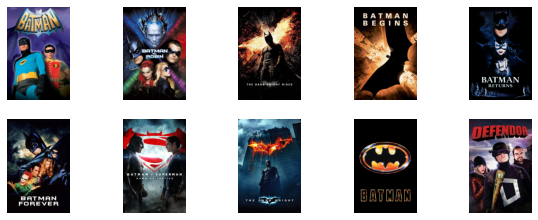

In [10]:
# Now that we got the poster addresses let us plot them

if len(posters) > 0:
    fig = plt.figure(figsize=(10,10))
    for i in range(len(posters)):
        fig.add_subplot(5,5,i+1)
        response = requests.get(posters[i])
        image = Image.open(BytesIO(response.content))
        plt.imshow(image)
        plt.axis('off')
    plt.show()
else:
    print('Nothing to recommend in the dataset')